## Introduction

This notebook is to be made as a test of your ability to create a Convolutional Neural Network for the Fashion MNIST dataset.

In [ ]:
#libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

In [ ]:
from tensorflow.keras.layers import Conv2D, Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

## Load, Analyze, and Format the Data

In [ ]:
#loaded data as per keras documentation
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0 #divide images for reduced size

In [ ]:
print(x_train.shape) #NumPy array of grayscale image data
print(x_test.shape) #NumPy array of grayscale image data
print(y_train.shape) #NumPy array of labels (integers in range 0-9)
print(y_test.shape) #NumPy array of labels (integers in range 0-9) 

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
#expand dimensions for us to have H x W x C
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
#get classes
K = len(set(y_train))
print(K)

10


## Instantiate, Compile, and Fit the Model

In [ ]:
#build the model
i = Input(shape=(x_train[0].shape))
x = Conv2D(32, (3,3), strides=2, padding='same', activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, padding='same', activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, padding='same', activation='relu')(x)
x = Flatten()(x) 
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
#compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train and fit the model
r = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4415 - accuracy: 0.8376 - val_loss: 0.3229 - val_accuracy: 0.8792
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2972 - accuracy: 0.8896 - val_loss: 0.2898 - val_accuracy: 0.8935
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2492 - accuracy: 0.9060 - val_loss: 0.2729 - val_accuracy: 0.8998
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2180 - accuracy: 0.9186 - val_loss: 0.2729 - val_accuracy: 0.9003
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1911 - accuracy: 0.9282 - val_loss: 0.2484 - val_accuracy: 0.9127
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1694 - accuracy: 0.9356 - val_loss: 0.2483 - val_accuracy: 0.9142
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1473 - accuracy: 0.9442 - val_loss: 0.2633 -

## Model Results

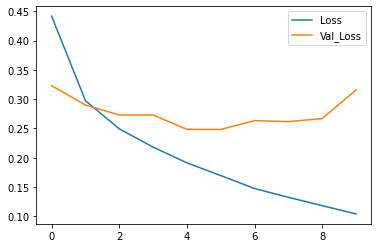

In [ ]:
#loss per iteration
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.show();

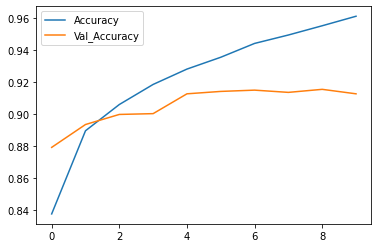

In [ ]:
#accuracy
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.show();

Confusion matrix, without normalization
[[889   0  15  13   2   1  75   0   5   0]
 [  1 976   1  13   5   0   3   0   1   0]
 [ 21   0 866   9  56   1  47   0   0   0]
 [ 12   0   5 929  34   0  18   0   2   0]
 [  2   0  67  19 872   0  39   0   1   0]
 [  1   0   0   0   0 987   0   9   0   3]
 [114   0  48  28  93   0 710   0   7   0]
 [  0   0   0   0   0  13   0 970   0  17]
 [  4   1   0   2   2   3  10   3 975   0]
 [  1   0   0   0   0   9   0  37   0 953]]


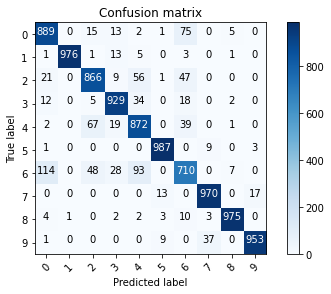

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [ ]:
labels = ['T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot']

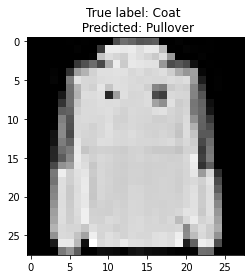

In [ ]:
miscl = np.where(p_test != y_test)[0]
i = np.random.choice(miscl)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s \n Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));
plt.show();